In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import cv2

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
n_epochs = 50


In [ ]:
image_size = 224
data_path="/content/drive/MyDrive/20.05.2023/classification/data/data_end"
class_names = ['glioma', 'meningioma','notumor','pituitary']

In [ ]:
def build_model(image_size=image_size, n_class=len(class_names)):
    # Su dung CNN VGG16
    model_vgg16_conv = VGG16(weights='imagenet', include_top=False)

    # Dong bang cac layer
    for layer in model_vgg16_conv.layers:
        layer.trainable = False

    # Tao model
    input = Input(shape=(image_size, image_size, 3), name='image_input')
    output_vgg16_conv = model_vgg16_conv(input)

    # Them cac layer FC va Dropout
    x = Flatten(name='flatten')(output_vgg16_conv)
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dropout(0.5)(x)
    x = Dense(4096, activation='relu', name='fc2')(x)
    x = Dropout(0.5)(x)
    x = Dense(n_class, activation='softmax', name='predictions')(x)

    # Compile
    my_model = Model(inputs=input, outputs=x)
    my_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return my_model


In [ ]:
def load_data(data_path, class_names, image_size):
    data = []
    label = []
    for i_class in class_names:
        read_path = os.path.join(data_path, i_class,"*")
        print(read_path)
        for file in glob.glob(read_path):
            # Read
            print(file)
            image = cv2.imread(file)
            # Resize
            image = cv2.resize(image, dsize=(image_size, image_size))
            # Add to data
            data.append(image)
            label.append(i_class)

    # Encode labels from text to onehot
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(label)
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

    # Change to numpy array
    label = onehot_encoded
    data = np.array(data)
    return data, label


In [ ]:
# Make model
my_model = build_model(image_size, len(class_names))

# Compile model
my_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Load data from folder
X_train, y_train = load_data('/content/drive/MyDrive/20.05.2023/classification/data/data_end/Training', class_names, image_size)
X_test, y_test = load_data('/content/drive/MyDrive/20.05.2023/classification/data/data_end/Testing', class_names, image_size)

my_model = build_model(image_size, len(class_names))
# Train the model and get the history
history = my_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/20.05.2023/classification/data/data_end/Training/meningioma/Tr-me_0542.jpg
/content/drive/MyDrive/20.05.2023/classification/data/data_end/Training/meningioma/Tr-me_0761.jpg
/content/drive/MyDrive/20.05.2023/classification/data/data_end/Training/meningioma/Tr-me_0606.jpg
/content/drive/MyDrive/20.05.2023/classification/data/data_end/Training/meningioma/Tr-me_0724.jpg
/content/drive/MyDrive/20.05.2023/classification/data/data_end/Training/meningioma/Tr-me_0588.jpg
/content/drive/MyDrive/20.05.2023/classification/data/data_end/Training/meningioma/Tr-me_0735.jpg
/content/drive/MyDrive/20.05.2023/classification/data/data_end/Training/meningioma/Tr-me_0717.jpg
/content/drive/MyDrive/20.05.2023/classification/data/data_end/Training/meningioma/Tr-me_0672.jpg
/content/drive/MyDrive/20.05.2023/classification/data/data_end/Training/meningioma/Tr-me_0827.jpg
/content/drive/MyDrive/20.05.2023/classification/data/data_end/Trai

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


/content/drive/MyDrive/20.05.2023/classification/data/data_end/Testing/glioma/*
/content/drive/MyDrive/20.05.2023/classification/data/data_end/Testing/glioma/gg (638).jpg
/content/drive/MyDrive/20.05.2023/classification/data/data_end/Testing/glioma/gg (629).jpg
/content/drive/MyDrive/20.05.2023/classification/data/data_end/Testing/glioma/gg (644).jpg
/content/drive/MyDrive/20.05.2023/classification/data/data_end/Testing/glioma/gg (609).jpg
/content/drive/MyDrive/20.05.2023/classification/data/data_end/Testing/glioma/gg (649).jpg
/content/drive/MyDrive/20.05.2023/classification/data/data_end/Testing/glioma/gg (608).jpg
/content/drive/MyDrive/20.05.2023/classification/data/data_end/Testing/glioma/gg (600).jpg
/content/drive/MyDrive/20.05.2023/classification/data/data_end/Testing/glioma/gg (628).jpg
/content/drive/MyDrive/20.05.2023/classification/data/data_end/Testing/glioma/gg (604).jpg
/content/drive/MyDrive/20.05.2023/classification/data/data_end/Testing/glioma/gg (630).jpg
/content/d

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
219/219 [==============================] - 45s 200ms/step - loss: 16.5706 - accuracy: 0.7884 - val_loss: 0.7174 - val_accuracy: 0.9000
Epoch 2/50
219/219 [==============================] - 42s 194ms/step - loss: 1.2595 - accuracy: 0.8760 - val_loss: 1.4778 - val_accuracy: 0.8664
Epoch 3/50
219/219 [==============================] - 38s 174ms/step - loss: 1.6910 - accuracy: 0.8737 - val_loss: 1.7615 - val_accuracy: 0.8293
Epoch 4/50
219/219 [==============================] - 42s 194ms/step - loss: 1.5914 - accuracy: 0.8946 - val_loss: 0.5728 - val_accuracy: 0.9300
Epoch 5/50
219/219 [==============================] - 43s 195ms/step - loss: 1.0968 - accuracy: 0.9167 - val_loss: 0.5459 - val_accuracy: 0.9429
Epoch 6/50
219/219 [==============================] - 42s 194ms/step - loss: 1.1069 - accuracy: 0.9203 - val_loss: 0.8597 - val_accuracy: 0.9436
Epoch 7/50
219/219 [==============================] - 43s 195ms/step - loss: 1.0292 - accuracy: 0.9246 - val_loss: 0.7078 - val_a

In [ ]:
from sklearn.metrics import confusion_matrix

y_prediction = my_model.predict(X_test)
y_prediction = np.argmax (y_prediction, axis = 1)
y_test=np.argmax(y_test, axis=1)
result = confusion_matrix(y_test, y_prediction , normalize='pred')
print(result)

44/44 [==============================] - 6s 126ms/step
[[0.97428571 0.02513966 0.         0.        ]
 [0.02285714 0.94413408 0.00283286 0.00884956]
 [0.         0.         0.99150142 0.        ]
 [0.00285714 0.03072626 0.00566572 0.99115044]]


              precision    recall  f1-score   support

      glioma       0.97      0.97      0.97       350
  meningioma       0.94      0.97      0.95       350
     notumor       0.99      1.00      1.00       350
   pituitary       0.99      0.96      0.98       350

    accuracy                           0.97      1400
   macro avg       0.98      0.97      0.98      1400
weighted avg       0.98      0.97      0.98      1400


Confusion matrix: X-Dự Đoán 	 Y-Nhãn Thật
0-Glioma	1-Meningioma		2-Noturmor	 3-Pituitary


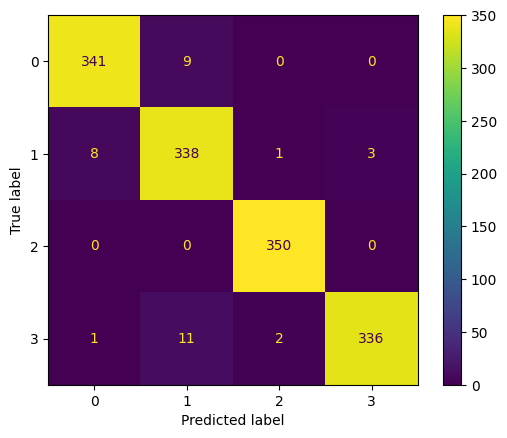

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

target_names = ['glioma', 'meningioma', 'notumor','pituitary']

print(classification_report(y_test, y_prediction, target_names=target_names))

ConfusionMatrixDisplay.from_predictions(
    y_test, y_prediction
)
print("\nConfusion matrix: X-Dự Đoán \t Y-Nhãn Thật\n0-Glioma\t1-Meningioma\t\t2-Noturmor\t 3-Pituitary")

In [ ]:
accurary = max(history.history['val_accuracy'])
print("Đô chính xác: ", accurary)

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Vẽ biểu đồ độ chính xác
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Vẽ biểu đồ mất mát
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


In [ ]:
my_model.save(os.path.join("/content/drive/MyDrive", "modelvgg16.h5"))

In [ ]:
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow
import os
import cv2
import tensorflow as tf
import numpy as np

In [ ]:
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
model_path = ('/content/drive/MyDrive/modelvgg16.h5')
target_names = ['glioma', 'meningioma', 'notumor','pituitary']

def predict_class_img_with_img(img_path):
    class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']
    # load model
    model = load_model(model_path)
    img_arr = cv2.imread(img_path)
    image = cv2.resize(img_arr, dsize=(224, 224))

    # print(np_img.shape)
    image = np.expand_dims(image, axis=0)

    predictions = model.predict(image)
    print(predictions)
    best = np.argmax(predictions[0], axis=0)
    score = predictions[0][best]
    print(score)

    print(f"Label is {class_names[int(best)]}, score is {score * 100}%")
    cv2_imshow(image[0])
    # return class_names[int(pred_labels)]

1/1 [==============================] - 9s 9s/step
[[1. 0. 0. 0.]]
1.0
Label is glioma, score is 100.0%


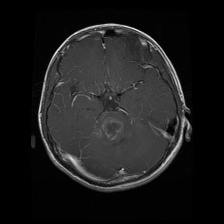

In [ ]:

img_path ='/content/drive/MyDrive/20.05.2023/classification/data/data_end/Testing/glioma/Te-glTr_0007.jpg'
predict_class_img_with_img(img_path)

tf.nn.sigmoid là hàm active multilabel
lablel classification

4: 1 não

In [ ]:
model = load_model(model_path)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.metrics import confusion_matrix
target_names = ['glioma', 'meningioma', 'notumor','pituitary']

image = cv2.imread(img_path)
# Resize
image = cv2.resize(image, dsize=(224, 224))
image = np.expand_dims(image, axis=0)
# np_arr = np.array(image)
y_prediction = model.predict(image)
print(y_prediction)
y_prediction = np.argmax (y_prediction, axis = 0)
y_test=np.argmax(y_prediction, axis=0)
# result = confusion_matrix(y_test, y_prediction , normalize='pred')
print(target_names[y_test])

1/1 [==============================] - 0s 230ms/step
[[1. 0. 0. 0.]]
glioma


1/1 [==============================] - 0s 158ms/step
[[0. 1. 0. 0.]]
1.0
Label is meningioma, score is 100.0%


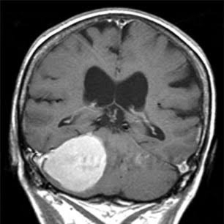

In [ ]:

img_path ='/content/drive/MyDrive/20.05.2023/classification/data/data_end/Testing/meningioma/Te-me_0020.jpg'
predict_class_img_with_img(img_path)

1/1 [==============================] - 0s 166ms/step
[[0. 1. 0. 0.]]
Predicted labels: ['meningioma']


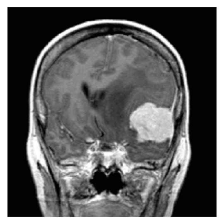

In [ ]:

img_path ='/content/drive/MyDrive/20.05.2023/classification/data/data_end/Testing/meningioma/Te-me_0014.jpg'
predict_class_img_with_img(img_path)

In [ ]:
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import cv2

model_path = ('/content/drive/MyDrive/modelvgg16.h5')

def predict_class_img_with_img(img_path):
    class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

    # load model
    model = load_model(model_path)
    img_arr = cv2.imread(img_path)
    np_img = np.array(img_arr)

    # print(np_img.shape)
    image = np.expand_dims(cv2.resize(np.squeeze(np_img), (224, 224)), axis=0)

    predictions = model.predict(image)
    scores = tf.nn.sigmoid(predictions)
    print(scores)
    pred_labels = np.argmax(scores, axis=-1)
    print(f"Label is {class_names[int(pred_labels)]}, score is {np.max(scores) * 100}%")
    cv2_imshow(image[0])
    # return class_names[int(pred_labels)]

1/1 [==============================] - 0s 291ms/step
tf.Tensor([[0.5        0.73105854 0.5        0.5       ]], shape=(1, 4), dtype=float32)
Label is meningioma, score is 73.10585379600525%


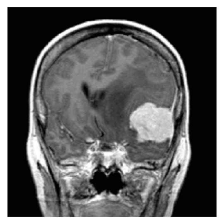

In [ ]:

img_path ='/content/drive/MyDrive/20.05.2023/classification/data/data_end/Testing/meningioma/Te-me_0014.jpg'
predict_class_img_with_img(img_path)